# Line-search methods

In [411]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100  # parameter for resolution of graphics
import time

v = 2  # variant corresponding to the number of the function below
Maxiter = 200 # Number of iterations
x0 = 2 # Initialization
a = 0   # Lower bound for the plot interval
b = 4   # Upper bound for the plot interval
Tol = 1e-15

InitStep = 1  # initial step
m1 = 0.1   #Parameters
m2 = 0.7

## Various objective functions

In [412]:
def fun(x,v):                   # function definition
    if v==0:
        return 3*(1.5*x-1)**2
    if v==1:
        return x**3-5*x+1
    if v==2:
        return x**4-2*x**3-5*x
    if v==3:
        return np.cos(5*x)-8*x+2.5*x**2
    if v==4:
        return np.cos(5*x)-8*x+1.5*x**2

def der(x,v):                   # first derivative
    if v==0:
        return 3*2*(1.5*x-1)*1.5
    if v==1:
        return 3*x**2-5
    if v==2:
        return 4*x**3-6*x**2-5
    if v==3:
        return -5*np.sin(5*x)-8+2.5*2*x
    if v==4:
        return -5*np.sin(5*x)-8+1.5*2*x


## Algorithm: Generic Line Search

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

 **Initialization:** Start with $t_l=t_r=0$ and pick an initial $t>0$.

 **Iterate:** 
 - **Step 1**
    - **if** (a) then exit: you found a good $t$
    - **if** (b) then $t_r = t$: you found a new upper bound for $t$
    - **if** (c) then $t_l = t$: you found a good new lower bound for $t$
 - **Step 2**
    - **if** no valid $t_r$ exists then choose a new $t>t_r$
    - **else** choose a new $t \in (t_l,t_r)$
   </div>





##  Goldstein-Price


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Goldstein-Price line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.
  
(a) $m_2 q'(0) \leq \frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ (then we have a good $t$)

(b) $m_1q'(0)< \frac{q(t)-q(0)}{t}$ (then $t$ is too big)

(c) $\frac{q(t)-q(0)}{t}<m_2q'(0)$ (then $t$ is too small)
    </div>



0   0
0   4
2.0   4
2.0   3.0
2.5


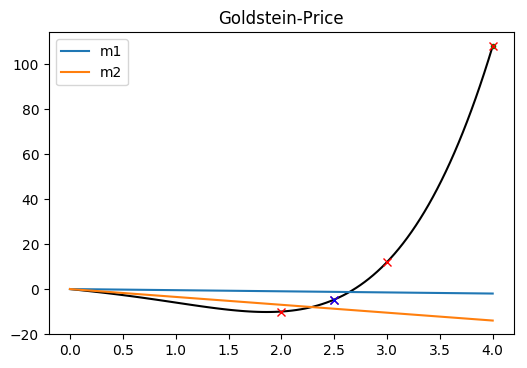

In [413]:
def LinesearchGP(q,dq,m1,m2):    
    tl = 0
    tr = 0
    t = b
    qp = dq(0,v)
    q0 = fun(0,v)
    xs = np.linspace(a,b)
    ys = q0+m1*qp*xs
    ys2 = q0+m2*qp*xs
    plt.plot(xs,ys,label="m1")
    plt.plot(xs,ys2,label="m2")
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    while (1==1):
        qt = q(t,v)
        plt.plot(t,qt,'xr')
        print(tl," ",tr)
        if ((qt-q0)/t<=(m1*qp)) and ((qt-q0)/t>=(m2*qp)):
            step=t   # we found a good step
            break
        if ((qt-q0)/t>(m1*qp)):
            # step too big
            tr = t
        if ((qt-q0)/t<(m2*qp)):
            # step too small
            tl = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if (tr-tl)<1e-15:
            break
    print(t)
    plt.plot(t,q(t,v),'xb')

uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
dnlim = -3
t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
plt.figure(1)
plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]

LinesearchGP(fun,der,m1,m2)
plt.title('Goldstein-Price')
plt.legend()
plt.show()  


## Armijo

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Armijo line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.

(a) $\frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ (then we have a good $t$)

(b) $m_1q'(0)< \frac{q(t)-q(0)}{t}$ (then $t$ is too big)

(c) Never. You may take $t_l=0$ always.
</div>

In [414]:
def LinesearchArmijo(q,dq,m1):    
    tl = 0
    tr = 0
    t = b
    qp = dq(0,v)
    q0 = fun(0,v)
    xs = np.linspace(a,b)
    ys = q0+m1*qp*xs
    plt.plot(xs,ys,label="m1")
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    while (1==1):
        qt = q(t,v)
        plt.plot(t,qt,'xr')
        print(tl," ",tr)
        if ((qt-q0)/t<=(m1*qp)):
            step=t   # we found a good step
            break
        if ((qt-q0)/t>(m1*qp)):
            # step too big
            tr = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if (tr-tl)<1e-15:
            break
    plt.plot(t,q(t,v),'xb')

0   0
0   4


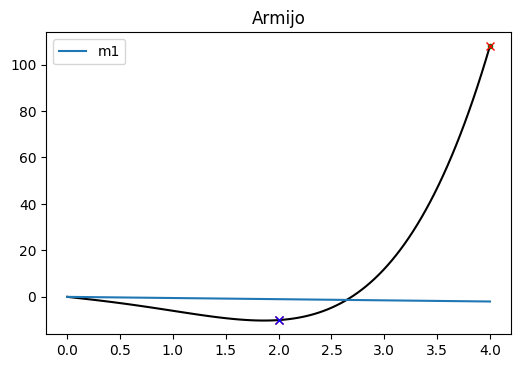

In [415]:
uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
dnlim = -3
t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
plt.figure(1)
plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]

LinesearchArmijo(fun,der,m1)
plt.title('Armijo')
plt.legend()
plt.show()

## Wolfe

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

Recall the three conditions for the **Wolfe line-search**

$\star$ $m_1,m_2 \in (0,1)$ are chosen constants such that $m_1<0.5$ and $m_2>0.5$.

(a) $\frac{q(t)-q(0)}{t} \leq m_1 q'(0)$ and $q'(t) \geq m_2 q'(0)$ (then we have a good $t$)
	
(b)  $\frac{q(t)-q(0)}{t}> m_1q'(0) $ (then $t$ is too big)
	
(c)  $\frac{q(t)-q(0)}{t}\leq m_1q'(0)$ and $q'(t) < m_2 q'(0)$ (then $t$ is too small)
</div>

0   0


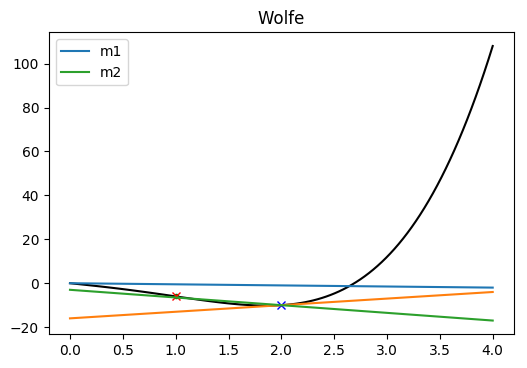

In [417]:
def LinesearchWolfe(q,dq,m1,m2):    
    tl = 0
    tr = 0
    t = 1
    qp = dq(0,v)
    q0 = fun(0,v)
    xs = np.linspace(a,b)
    ys = q0+m1*qp*xs
    plt.plot(xs,ys,label="m1")
    qt = q(t,v)
    plt.plot(t,qt,'.g')
    while (1==1):
        qt = q(t,v)
        plt.plot(t,qt,'xr')
        print(tl," ",tr)
        if ((qt-q0)/t<=(m1*qp)) and dq(t,v)>=m2*qp:
            step=t   # we found a good step
            break
        if ((qt-q0)/t>(m1*qp)):
            # step too big
            tr = t
        if ((qt-q0)/t<=(m1*qp)) and dq(t,v)<m2*qp:
            # step too small
            tl = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if (tr-tl)<1e-15:
            break
    plt.plot(t,q(t,v),'xb')
    plt.plot(t1,q(t,v)+dq(t,v)*(t1-t))
    plt.plot(t1,q(t,v)+m2*qp*(t1-t),label="m2")

    
uplim = max(fun(a,v),fun(b,v))+1   # set limits for the plot window
dnlim = -3
t1 = np.linspace(a,b,100)          # Create a discretization to be used with the plots
plt.figure(1)
plt.plot(t1,fun(t1,v),'k')         # Plot the function to be optimized on the interval [a,b]

LinesearchWolfe(fun,der,m1,m2)
plt.title('Wolfe')
plt.legend()
plt.show()